In [22]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from nltk.util import ngrams 
from nltk import everygrams

# Import custom functions
from explore import tokenize
from explore import tokenizeNgrams
from explore import getTokenFreq

In [8]:
# Import cleaned dataset
df = pd.read_csv('../data/processed/clean_data.csv')

In [9]:
df.isna().sum()

tweet_lowercase                  0
handle_count                     0
remove_empty_hashtag             0
tweet_length                     0
character_count                  0
lemmatized                       2
lemma_no_space_after_hashtag     2
lemma_final                      2
tweet_no_stopwords              25
tweet_no_stopwords_no_short     39
neg_label                        0
dtype: int64

In [10]:
len(df)

42031

In [12]:
nanValues = df.loc[df['tweet_no_stopwords_no_short'].isna()]
nanValues.head(5)

,tweet_lowercase,handle_count,remove_empty_hashtag,tweet_length,character_count,lemmatized,lemma_no_space_after_hashtag,lemma_final,tweet_no_stopwords,tweet_no_stopwords_no_short,neg_label
385,what i doð,0,what i do,14,7,what i do,what i do,what i do,NaN,NaN,0
566,@user it's at $7.25,1,it's at,16,6,it 's at,it 's at,it's at,'s,NaN,0
1549,@user @user @user @user @user @user @user @us...,10,,10,0,NaN,NaN,NaN,NaN,NaN,0
2878,it was in 2008,0,it was in,15,7,it be in,it be in,it be in,NaN,NaN,0
2984,@user then why are you,1,then why are you,19,13,then why be you,then why be you,then why be you,NaN,NaN,0


In [13]:
# Filter to have non-missing values
df = df.loc[df['tweet_no_stopwords_no_short'].notnull()]

In [14]:
df.isna().sum()

tweet_lowercase                 0
handle_count                    0
remove_empty_hashtag            0
tweet_length                    0
character_count                 0
lemmatized                      0
lemma_no_space_after_hashtag    0
lemma_final                     0
tweet_no_stopwords              0
tweet_no_stopwords_no_short     0
neg_label                       0
dtype: int64

In [15]:
df.head(5)

,tweet_lowercase,handle_count,remove_empty_hashtag,tweet_length,character_count,lemmatized,lemma_no_space_after_hashtag,lemma_final,tweet_no_stopwords,tweet_no_stopwords_no_short,neg_label
0,13 days to go #gettingthere,0,days to go #gettingthere,30,21,day to go # gettingthere,day to go #gettingthere,day to go #gettingthere,day go # gettingthere,day gettingthere,0
1,@anggxo get off my twitter fag,1,get off my twitter fag,23,18,get off my twitter fag,get off my twitter fag,get off my twitter fag,get twitter fag,get twitter fag,1
2,these hoes got more bodies than a cemetery&#12...,0,these hoes got more bodies than a cemetery ...,58,35,these hoe get more body than a cemetery # # #,these hoe get more body than a cemetery ###,these hoe get more body than a cemetery ###,hoe get body cemetery # # #,hoe get body cemetery,1
3,a friend just told me she's afraid to go to dc...,1,a friend just told me she's afraid to go to dc...,124,95,a friend just tell me she 's afraid to go to d...,a friend just tell me she 's afraid to go to d...,a friend just tell me she's afraid to go to dc...,friend tell 's afraid go dc rally amp attack #...,friend tell afraid rally amp attack berniebros...,0
4,i've noticed a lot of #icontf16 presentations ...,1,i've noticed a lot of #icontf presentations ...,117,95,i 've notice a lot of # icontf presentation me...,i 've notice a lot of #icontf presentation men...,i've notice a lot of #icontf presentation ment...,'ve notice lot # icontf presentation mention h...,'ve notice lot icontf presentation mention hap...,0


# Dividing into negative and positive dataframes

Allows us to better look at differences and features of the types of data present.

In [16]:
df_pos = df.loc[df['neg_label'] == 0]
len(df_pos)

21383

In [17]:
df_neg = df.loc[df['neg_label'] == 1]
len(df_neg)

20609

# Tokenization

### Positive Dataframe

We make a few more modifications to the words present in the data. We should separate the hashtags from the words and perform a separate analysis. We make adjustments to some of the words not taken care of in lemmatization.

In [18]:
# Replacing n't with not and modifying other features
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace("n't", "not")
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace("'ve", "")
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace("'re", "")
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace("wan na", "wanna")
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace("gon na", "gonna")

In [19]:
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace(" '", "")
df_pos['tweet_no_stopwords_no_short'] = df_pos['tweet_no_stopwords_no_short'].str.replace("' ", "")

df_pos.head(5)

,tweet_lowercase,handle_count,remove_empty_hashtag,tweet_length,character_count,lemmatized,lemma_no_space_after_hashtag,lemma_final,tweet_no_stopwords,tweet_no_stopwords_no_short,neg_label
0,13 days to go #gettingthere,0,days to go #gettingthere,30,21,day to go # gettingthere,day to go #gettingthere,day to go #gettingthere,day go # gettingthere,day gettingthere,0
3,a friend just told me she's afraid to go to dc...,1,a friend just told me she's afraid to go to dc...,124,95,a friend just tell me she 's afraid to go to d...,a friend just tell me she 's afraid to go to d...,a friend just tell me she's afraid to go to dc...,friend tell 's afraid go dc rally amp attack #...,friend tell afraid rally amp attack berniebros...,0
4,i've noticed a lot of #icontf16 presentations ...,1,i've noticed a lot of #icontf presentations ...,117,95,i 've notice a lot of # icontf presentation me...,i 've notice a lot of #icontf presentation men...,i've notice a lot of #icontf presentation ment...,'ve notice lot # icontf presentation mention h...,notice lot icontf presentation mention happin...,0
5,getting for this weekends shows! #country #m...,0,getting for this weekends shows #country #m...,62,52,get for this weekend show # country # music # ...,get for this weekend show #country #music #lyl...,get for this weekend show #country #music #lyl...,get weekend show # country # music # lylepierce,get weekend show country music lylepierce,0
6,@user my final legislative session day has of...,3,my final legislative session day has officia...,69,53,my final legislative session day have official...,my final legislative session day have official...,my final legislative session day have official...,final legislative session day officially begin...,final legislative session day officially begin...,0


In [35]:
# Make new columns for positives with a list of words
df_pos['tweet_lowercase_token'] = df_pos[df_pos['tweet_lowercase'].notna()]['tweet_lowercase'].apply(tokenize)

In [37]:
df_pos['lemma_final_token'] = df_pos[df_pos['lemma_final'].notna()]['lemma_final'].apply(tokenize)

In [38]:
df_pos['lemma_no_space_after_hashtag_token'] = df_pos[df_pos['lemma_no_space_after_hashtag'].notna()]['lemma_no_space_after_hashtag'].apply(tokenize)

In [40]:
df_pos['tweet_abridged_token'] = df_pos[df_pos['tweet_no_stopwords_no_short'].notna()]['tweet_no_stopwords_no_short'].apply(tokenize)

In [41]:
df_pos.head(5)

,tweet_lowercase,handle_count,remove_empty_hashtag,tweet_length,character_count,lemmatized,lemma_no_space_after_hashtag,lemma_final,tweet_no_stopwords,tweet_no_stopwords_no_short,neg_label,tweet_lowercase_token,lemma_final_token,lemma_no_space_after_hashtag_token,tweet_abridged_token
0,13 days to go #gettingthere,0,days to go #gettingthere,30,21,day to go # gettingthere,day to go #gettingthere,day to go #gettingthere,day go # gettingthere,day gettingthere,0,"[13, days, to, go, #gettingthere]","[day, to, go, #gettingthere]","[day, to, go, #gettingthere]","[day, gettingthere]"
3,a friend just told me she's afraid to go to dc...,1,a friend just told me she's afraid to go to dc...,124,95,a friend just tell me she 's afraid to go to d...,a friend just tell me she 's afraid to go to d...,a friend just tell me she's afraid to go to dc...,friend tell 's afraid go dc rally amp attack #...,friend tell afraid rally amp attack berniebros...,0,"[a, friend, just, told, me, she's, afraid, to,...","[a, friend, just, tell, me, she's, afraid, to,...","[a, friend, just, tell, me, she, ', s, afraid,...","[friend, tell, afraid, rally, amp, attack, ber..."
4,i've noticed a lot of #icontf16 presentations ...,1,i've noticed a lot of #icontf presentations ...,117,95,i 've notice a lot of # icontf presentation me...,i 've notice a lot of #icontf presentation men...,i've notice a lot of #icontf presentation ment...,'ve notice lot # icontf presentation mention h...,notice lot icontf presentation mention happin...,0,"[i've, noticed, a, lot, of, #icontf16, present...","[i've, notice, a, lot, of, #icontf, presentati...","[i, ', ve, notice, a, lot, of, #icontf, presen...","[notice, lot, icontf, presentation, mention, h..."
5,getting for this weekends shows! #country #m...,0,getting for this weekends shows #country #m...,62,52,get for this weekend show # country # music # ...,get for this weekend show #country #music #lyl...,get for this weekend show #country #music #lyl...,get weekend show # country # music # lylepierce,get weekend show country music lylepierce,0,"[getting, for, this, weekends, shows, !, #coun...","[get, for, this, weekend, show, #country, #mus...","[get, for, this, weekend, show, #country, #mus...","[get, weekend, show, country, music, lylepierce]"
6,@user my final legislative session day has of...,3,my final legislative session day has officia...,69,53,my final legislative session day have official...,my final legislative session day have official...,my final legislative session day have official...,final legislative session day officially begin...,final legislative session day officially begin...,0,"[@user, my, final, legislative, session, day, ...","[my, final, legislative, session, day, have, o...","[my, final, legislative, session, day, have, o...","[final, legislative, session, day, officially,..."


In [42]:
tokens_pos = getTokenFreq(df_pos['tweet_abridged_token'])

In [48]:
tokens_pos = tokens_pos.sort_values(by = 'tokencount', ascending = False)
tokens_pos.head(15)

,token,tokencount,docAppeared
tokenID,,,
0,day,2125,1955
123,love,1969,1824
119,not,1608,1502
22,get,1327,1273
227,happy,1254,1187
3,amp,1106,988
38,life,924,852
266,make,842,804
136,today,831,823


### Negative Dataframes

We make similar changes like in the positive tweet dataframe.

In [49]:
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace("n't", "not")
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace("'ve", "")
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace("'re", "")
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace("wan na", "wanna")
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace("gon na", "gonna")

In [50]:
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace(" '", "")
df_neg['tweet_no_stopwords_no_short'] = df_neg['tweet_no_stopwords_no_short'].str.replace("' ", "")

df_neg.head(5)

,tweet_lowercase,handle_count,remove_empty_hashtag,tweet_length,character_count,lemmatized,lemma_no_space_after_hashtag,lemma_final,tweet_no_stopwords,tweet_no_stopwords_no_short,neg_label
1,@anggxo get off my twitter fag,1,get off my twitter fag,23,18,get off my twitter fag,get off my twitter fag,get off my twitter fag,get twitter fag,get twitter fag,1
2,these hoes got more bodies than a cemetery&#12...,0,these hoes got more bodies than a cemetery ...,58,35,these hoe get more body than a cemetery # # #,these hoe get more body than a cemetery ###,these hoe get more body than a cemetery ###,hoe get body cemetery # # #,hoe get body cemetery,1
7,@lucas_wright955 @michaelgt03 faggots,2,faggots,9,7,faggot,faggot,faggot,faggot,faggot,1
10,"@hoponthebeast i found her right here, good jo...",1,i found her right here good job unfollowing ...,60,47,i find her right here good job unfollowing me ...,i find her right here good job unfollowing me ...,i find her right here good job unfollowing me ...,find right good job unfollowing btw faggot,find right good job unfollowing btw faggot,1
14,"technology ain't doin nothing, but making thes...",0,technology ain't doin nothing but making thes...,64,54,technology ai n't doin nothing but make these ...,technology ai n't doin nothing but make these ...,technology ai n't doin nothing but make these ...,technology ai n't doin nothing make hoe look good,technology not doin nothing make hoe look good,1


In [51]:
df_neg['tweet_lowercase_token'] = df_neg[df_neg['tweet_lowercase'].notna()]['tweet_lowercase'].apply(tokenize)

In [52]:
df_neg['lemma_final_token'] = df_neg[df_neg['lemma_final'].notna()]['lemma_final'].apply(tokenize)

In [53]:
df_neg['lemma_no_space_after_hashtag_token'] = df_neg[df_neg['lemma_no_space_after_hashtag'].notna()]['lemma_no_space_after_hashtag'].apply(tokenize)

In [54]:
df_neg['tweet_abridged_token'] = df_neg[df_neg['tweet_no_stopwords_no_short'].notna()]['tweet_no_stopwords_no_short'].apply(tokenize)

In [55]:
tokens_neg = getTokenFreq(df_neg['tweet_abridged_token'])

In [56]:
tokens_neg = tokens_neg.sort_values(by = 'tokencount', ascending = False)
tokens_neg.head(15)

,token,tokencount,docAppeared
tokenID,,,
21,bitch,11408,10672
5,hoe,4266,3957
16,not,3334,3017
1,get,3024,2768
120,like,2541,2319
36,pussy,2250,2150
42,fuck,2046,1886
35,nigga,1707,1539
152,ass,1591,1478


# Visualization

We look at the most recurring negative and positive words, in both hashtags and the lexicon {1-gram}.

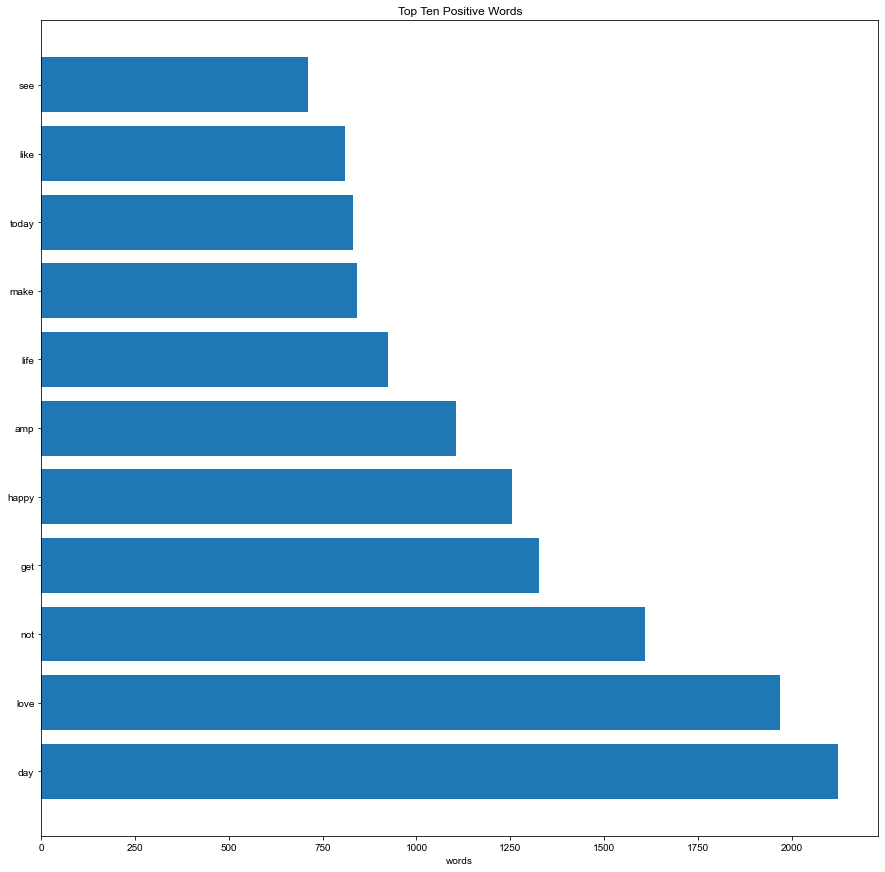

In [57]:
# Plot top 10 positive words 1-gram (hashtags and standard lexicon)
top_10_positive = tokens_pos[:11]
fig, ax = plt.subplots(figsize = (15, 15))

plt.style.use('seaborn')
ax.barh(top_10_positive['token'], top_10_positive['tokencount'])
plt.xlabel('counts')
plt.xlabel('words')
plt.title('Top Ten Positive Words')

plt.show()

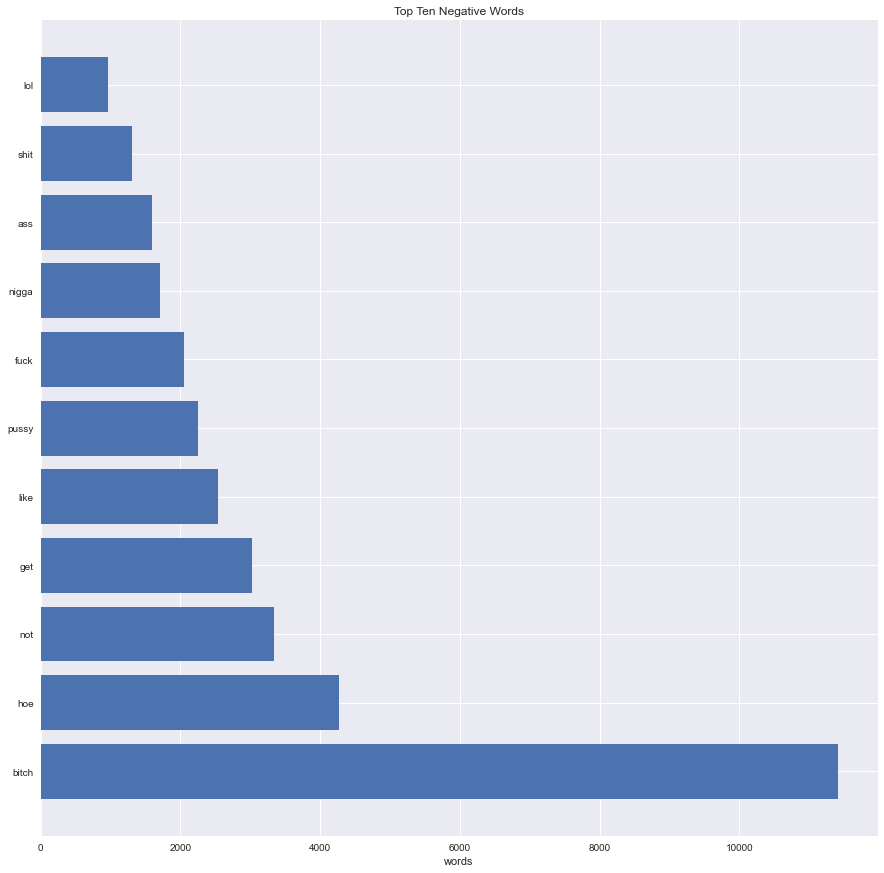

In [58]:
# Plot top 10 negative words 1-gram (hashtags and standard lexicon)
top_10_negative = tokens_neg[:11]
fig, ax = plt.subplots(figsize = (15, 15))

plt.style.use('seaborn')
ax.barh(top_10_negative['token'], top_10_negative['tokencount'])
plt.xlabel('counts')
plt.xlabel('words')
plt.title('Top Ten Negative Words')

plt.show()

#### Building 2-grams for positive and negative


In [60]:
df_pos_2_grams = df_pos[['tweet_no_stopwords_no_short', 'lemma_no_space_after_hashtag', 'tweet_no_stopwords']]
df_pos_2_grams

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords
0,day gettingthere,day to go #gettingthere,day go # gettingthere
3,friend tell afraid rally amp attack berniebros...,a friend just tell me she 's afraid to go to d...,friend tell 's afraid go dc rally amp attack #...
4,notice lot icontf presentation mention happin...,i 've notice a lot of #icontf presentation men...,'ve notice lot # icontf presentation mention h...
5,get weekend show country music lylepierce,get for this weekend show #country #music #lyl...,get weekend show # country # music # lylepierce
6,final legislative session day officially begin...,my final legislative session day have official...,final legislative session day officially begin...
...,...,...,...
42021,x'mas amp bihday disney love thanks karen,`` x'mas amp my bihday disney `` #love #thanks...,`` x'mas amp bihday disney `` # love # thanks ...
42022,soul happiest water soul happy happy water oce...,my soul be happiest on the water #soul #happy ...,soul happiest water # soul # happy # happy # w...
42023,nzd usd post rbnz rally almost reverse closer ...,#nzd usd post rbnz rally almost reverse closer...,# nzd usd post rbnz rally almost reverse close...
42025,bihday leo mom celia,#bihday to leo 's mom #celia,# bihday leo 's mom # celia


In [62]:
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("# ", "#")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace(" n't", "n't")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace(" '", "'")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("gon na", "gonna")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("' m", "'m")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("' ve", "'ve")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("' re", "'re")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("' ll", "'ll")
df_pos_2_grams['tweet_no_stopwords'] = df_pos_2_grams['tweet_no_stopwords'].str.replace("wan na", "wanna")

In [63]:
df_pos_2_grams.head(5)

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords
0,day gettingthere,day to go #gettingthere,day go #gettingthere
3,friend tell afraid rally amp attack berniebros...,a friend just tell me she 's afraid to go to d...,friend tell's afraid go dc rally amp attack #b...
4,notice lot icontf presentation mention happin...,i 've notice a lot of #icontf presentation men...,'ve notice lot #icontf presentation mention ha...
5,get weekend show country music lylepierce,get for this weekend show #country #music #lyl...,get weekend show #country #music #lylepierce
6,final legislative session day officially begin...,my final legislative session day have official...,final legislative session day officially begin...


In [64]:
df_pos_2_grams['2-grams'] = df_pos_2_grams['tweet_no_stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 2, 2)])

In [65]:
df_pos_2_grams

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords,2-grams
0,day gettingthere,day to go #gettingthere,day go #gettingthere,"[day go, go #gettingthere]"
3,friend tell afraid rally amp attack berniebros...,a friend just tell me she 's afraid to go to d...,friend tell's afraid go dc rally amp attack #b...,"[friend tell's, tell's afraid, afraid go, go d..."
4,notice lot icontf presentation mention happin...,i 've notice a lot of #icontf presentation men...,'ve notice lot #icontf presentation mention ha...,"[' ve, ve notice, notice lot, lot #icontf, #ic..."
5,get weekend show country music lylepierce,get for this weekend show #country #music #lyl...,get weekend show #country #music #lylepierce,"[get weekend, weekend show, show #country, #co..."
6,final legislative session day officially begin...,my final legislative session day have official...,final legislative session day officially begin...,"[final legislative, legislative session, sessi..."
...,...,...,...,...
42021,x'mas amp bihday disney love thanks karen,`` x'mas amp my bihday disney `` #love #thanks...,`` x'mas amp bihday disney `` #love #thanks #k...,"[` `, ` x'mas, x'mas amp, amp bihday, bihday d..."
42022,soul happiest water soul happy happy water oce...,my soul be happiest on the water #soul #happy ...,soul happiest water #soul #happy #happy #water...,"[soul happiest, happiest water, water #soul, #..."
42023,nzd usd post rbnz rally almost reverse closer ...,#nzd usd post rbnz rally almost reverse closer...,#nzd usd post rbnz rally almost reverse closer...,"[#nzd usd, usd post, post rbnz, rbnz rally, ra..."
42025,bihday leo mom celia,#bihday to leo 's mom #celia,#bihday leo's mom #celia,"[#bihday leo's, leo's mom, mom #celia]"


In [68]:
tokens_2_gram = getTokenFreq(df_pos_2_grams['2-grams'])
tokens_2_gram = tokens_2_gram.sort_values(by = "tokencount", ascending = False)
tokens_2_gram.head(5)

,token,tokencount,docAppeared
tokenID,,,
636,' s,396,396
332,father's day,251,249
413,can't wait,248,247
187,' m,246,246
311,#blog #silver,229,229


In [70]:
df_neg_2_grams = df_neg[['tweet_no_stopwords_no_short', 'lemma_no_space_after_hashtag', 'tweet_no_stopwords']]

In [71]:
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("# ", "#")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace(" n't", "n't")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace(" '", "'")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("gon na", "gonna")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("' m", "'m")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("' ve", "'ve")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("' re", "'re")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("' ll", "'ll")
df_neg_2_grams['tweet_no_stopwords'] = df_neg_2_grams['tweet_no_stopwords'].str.replace("wan na", "wanna")

In [72]:
df_neg_2_grams.head(5)

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords
1,get twitter fag,get off my twitter fag,get twitter fag
2,hoe get body cemetery,these hoe get more body than a cemetery ###,hoe get body cemetery ###
7,faggot,faggot,faggot
10,find right good job unfollowing btw faggot,i find her right here good job unfollowing me ...,find right good job unfollowing btw faggot
14,technology not doin nothing make hoe look good,technology ai n't doin nothing but make these ...,technology ain't doin nothing make hoe look good


In [73]:
# Creating 2-grams and 3-grams for negative
df_neg_2_grams['2-grams'] = df_neg_2_grams['tweet_no_stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 2, 2)])

In [74]:
df_neg_2_grams

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords,2-grams
1,get twitter fag,get off my twitter fag,get twitter fag,"[get twitter, twitter fag]"
2,hoe get body cemetery,these hoe get more body than a cemetery ###,hoe get body cemetery ###,"[hoe get, get body, body cemetery, cemetery #,..."
7,faggot,faggot,faggot,[]
10,find right good job unfollowing btw faggot,i find her right here good job unfollowing me ...,find right good job unfollowing btw faggot,"[find right, right good, good job, job unfollo..."
14,technology not doin nothing make hoe look good,technology ai n't doin nothing but make these ...,technology ain't doin nothing make hoe look good,"[technology ain't, ain't doin, doin nothing, n..."
...,...,...,...,...
42024,trash talk many hat guess many fuck give less one,rt trash talk by many hat by some guess how ma...,rt trash talk many hat guess many fuck give le...,"[rt trash, trash talk, talk many, many hat, ha..."
42026,swag bitch aha,its swag bitch aha,swag bitch aha,"[swag bitch, bitch aha]"
42028,hmu talmbout match pull niccas wit smfh shit l...,rt #hmu talmbout match but when i pull up its ...,rt #hmu talmbout match pull niccas wit ya ##sm...,"[rt #hmu, #hmu talmbout, talmbout match, match..."
42029,true ride die bitch,rt this be a true ride or die bitch #,rt true ride die bitch #,"[rt true, true ride, ride die, die bitch, bitc..."


In [76]:
tokens_2_gram_neg = getTokenFreq(df_neg_2_grams['2-grams'])
tokens_2_gram_neg = tokens_2_gram_neg.sort_values(by='tokencount', ascending = False)

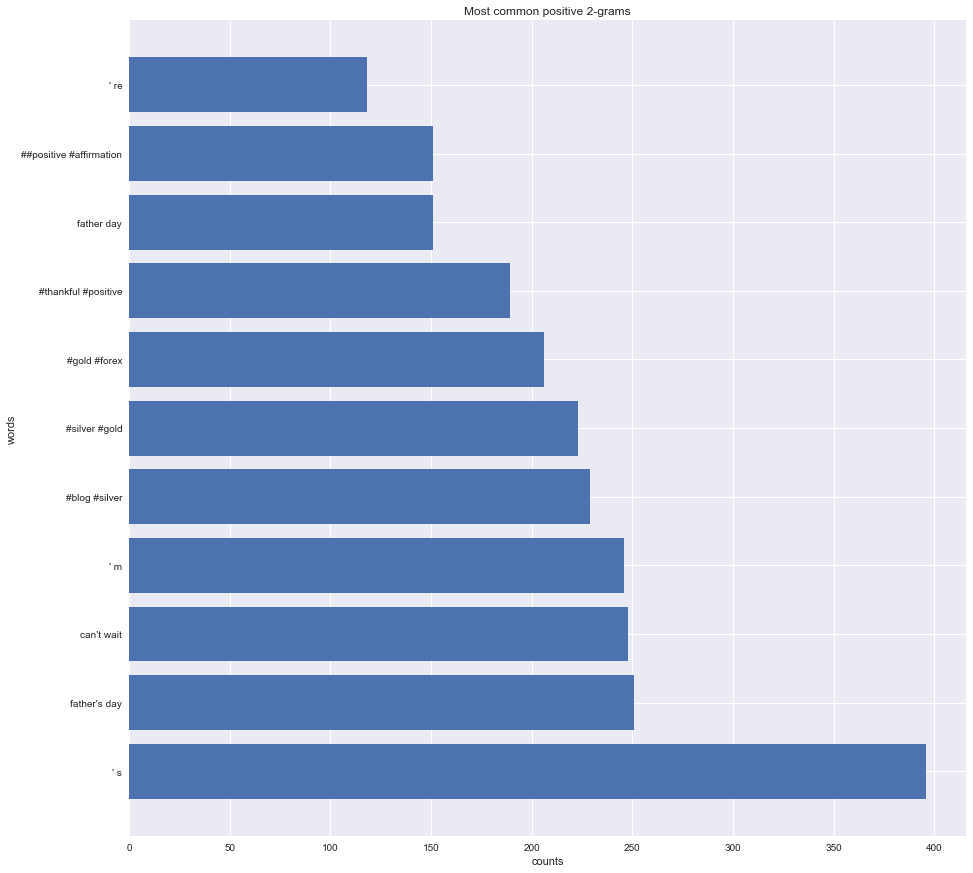

In [77]:
# Top 10 words 2-grams positive
top_10_pos_2_grams = tokens_2_gram[:11]
fig, ax = plt.subplots(figsize = (15, 15))

plt.style.use('seaborn')
ax.barh(top_10_pos_2_grams['token'], top_10_pos_2_grams['tokencount'])
plt.xlabel('counts')
plt.ylabel('words')
plt.title('Most common positive 2-grams')

plt.show()

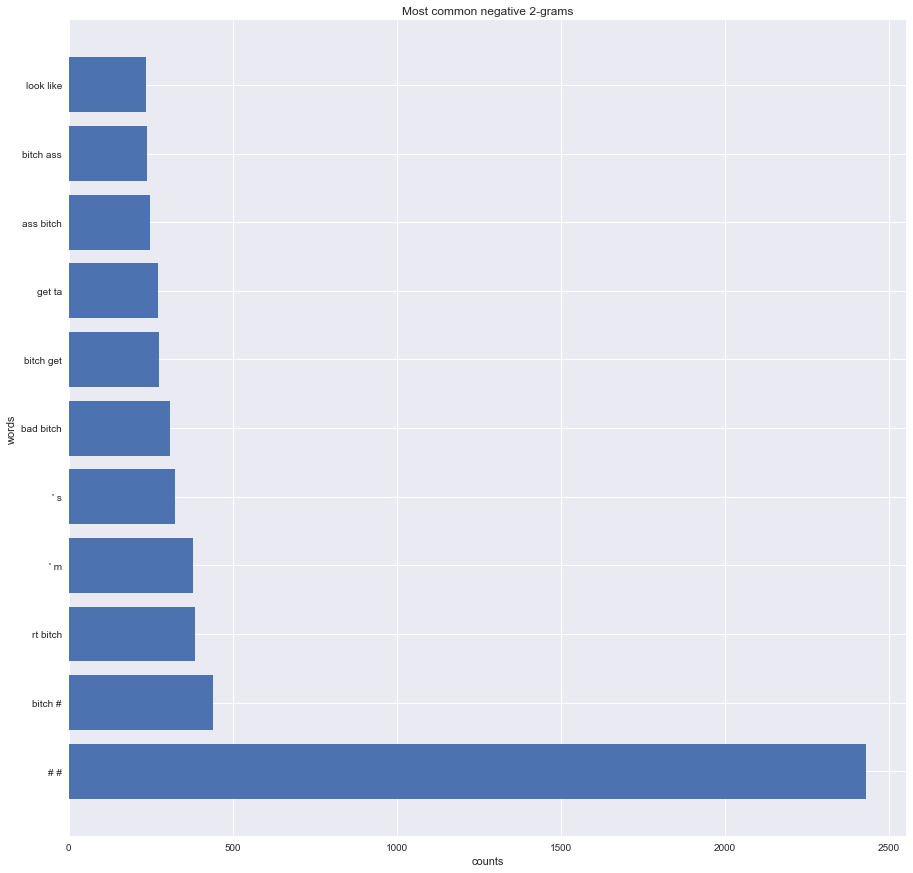

In [78]:
# Top 10 words 2-grams negative
top_10_neg_2_grams = tokens_2_gram_neg[:11]
fig, ax = plt.subplots(figsize = (15, 15))

plt.style.use('seaborn')
ax.barh(top_10_neg_2_grams['token'], top_10_neg_2_grams['tokencount'])
plt.xlabel('counts')
plt.ylabel('words')
plt.title('Most common negative 2-grams')

plt.show()

In [79]:
# Building 3-gram positive
df_pos_3_grams = df_pos[['tweet_no_stopwords_no_short', 'lemma_no_space_after_hashtag', 'tweet_no_stopwords']]
df_pos_3_grams

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords
0,day gettingthere,day to go #gettingthere,day go # gettingthere
3,friend tell afraid rally amp attack berniebros...,a friend just tell me she 's afraid to go to d...,friend tell 's afraid go dc rally amp attack #...
4,notice lot icontf presentation mention happin...,i 've notice a lot of #icontf presentation men...,'ve notice lot # icontf presentation mention h...
5,get weekend show country music lylepierce,get for this weekend show #country #music #lyl...,get weekend show # country # music # lylepierce
6,final legislative session day officially begin...,my final legislative session day have official...,final legislative session day officially begin...
...,...,...,...
42021,x'mas amp bihday disney love thanks karen,`` x'mas amp my bihday disney `` #love #thanks...,`` x'mas amp bihday disney `` # love # thanks ...
42022,soul happiest water soul happy happy water oce...,my soul be happiest on the water #soul #happy ...,soul happiest water # soul # happy # happy # w...
42023,nzd usd post rbnz rally almost reverse closer ...,#nzd usd post rbnz rally almost reverse closer...,# nzd usd post rbnz rally almost reverse close...
42025,bihday leo mom celia,#bihday to leo 's mom #celia,# bihday leo 's mom # celia


In [81]:
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("# ", "#")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace(" n't", "n't")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace(" '", "'")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("gon na", "gonna")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("' m", "'m")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("' ve", "'ve")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("' re", "'re")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("' ll", "'ll")
df_pos_3_grams['tweet_no_stopwords'] = df_pos_3_grams['tweet_no_stopwords'].str.replace("wan na", "wanna")

In [83]:
# Creating 3-grams
df_pos_3_grams['3-grams'] = df_pos_3_grams['tweet_no_stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 3, 3)])

In [84]:
tokens_3_gram = getTokenFreq(df_pos_3_grams['3-grams'])
tokens_3_gram = tokens_3_gram.sort_values(by='tokencount', ascending = False)

In [85]:
df_neg_3_grams = df_neg[['tweet_no_stopwords_no_short', 'lemma_no_space_after_hashtag', 'tweet_no_stopwords']]
df_neg_3_grams

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords
1,get twitter fag,get off my twitter fag,get twitter fag
2,hoe get body cemetery,these hoe get more body than a cemetery ###,hoe get body cemetery # # #
7,faggot,faggot,faggot
10,find right good job unfollowing btw faggot,i find her right here good job unfollowing me ...,find right good job unfollowing btw faggot
14,technology not doin nothing make hoe look good,technology ai n't doin nothing but make these ...,technology ai n't doin nothing make hoe look good
...,...,...,...
42024,trash talk many hat guess many fuck give less one,rt trash talk by many hat by some guess how ma...,rt trash talk many hat guess many fuck give le...
42026,swag bitch aha,its swag bitch aha,swag bitch aha
42028,hmu talmbout match pull niccas wit smfh shit l...,rt #hmu talmbout match but when i pull up its ...,rt # hmu talmbout match pull niccas wit ya # #...
42029,true ride die bitch,rt this be a true ride or die bitch #,rt true ride die bitch #


In [86]:
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("# ", "#")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace(" n't", "n't")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace(" '", "'")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("gon na", "gonna")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("' m", "'m")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("' ve", "'ve")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("' re", "'re")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("' ll", "'ll")
df_neg_3_grams['tweet_no_stopwords'] = df_neg_3_grams['tweet_no_stopwords'].str.replace("wan na", "wanna")

In [87]:
# Creating 3-grams
df_neg_3_grams['3-grams'] = df_neg_3_grams['tweet_no_stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 3, 3)])

In [88]:
df_neg_3_grams

,tweet_no_stopwords_no_short,lemma_no_space_after_hashtag,tweet_no_stopwords,3-grams
1,get twitter fag,get off my twitter fag,get twitter fag,[get twitter fag]
2,hoe get body cemetery,these hoe get more body than a cemetery ###,hoe get body cemetery ###,"[hoe get body, get body cemetery, body cemeter..."
7,faggot,faggot,faggot,[]
10,find right good job unfollowing btw faggot,i find her right here good job unfollowing me ...,find right good job unfollowing btw faggot,"[find right good, right good job, good job unf..."
14,technology not doin nothing make hoe look good,technology ai n't doin nothing but make these ...,technology ain't doin nothing make hoe look good,"[technology ain't doin, ain't doin nothing, do..."
...,...,...,...,...
42024,trash talk many hat guess many fuck give less one,rt trash talk by many hat by some guess how ma...,rt trash talk many hat guess many fuck give le...,"[rt trash talk, trash talk many, talk many hat..."
42026,swag bitch aha,its swag bitch aha,swag bitch aha,[swag bitch aha]
42028,hmu talmbout match pull niccas wit smfh shit l...,rt #hmu talmbout match but when i pull up its ...,rt #hmu talmbout match pull niccas wit ya ##sm...,"[rt #hmu talmbout, #hmu talmbout match, talmbo..."
42029,true ride die bitch,rt this be a true ride or die bitch #,rt true ride die bitch #,"[rt true ride, true ride die, ride die bitch, ..."


In [91]:
tokens_3_gram_neg = getTokenFreq(df_neg_3_grams['3-grams'])
tokens_3_gram_neg =tokens_3_gram_neg.sort_values(by='tokencount', ascending = False)

In [ ]:
top_ten_pos_3 = tokens_3_gram[:11]

fig, ax = plt.subplots(figsize = (15,15))

plt.style.use('seaborn')
ax.barh(top_10_pos_3['token'], top_ten_pos_3['token_count'])
plt.xlabel('counts')
plt.ylabel('words')
plt.title('Most common positive 3-grams')

plt.show()